### Pima Indian Diabetes Analysis

We will use logistic regression to model the "Pima Indians Diabetes" data set. This model will predict which people are likely to develop diabetes.


This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.


<b>Data Dictionary</b>:

Preg: Number of times pregnant<br>
Plas: glucose concentration a 2 hours in an oral glucose tolerance test<br>
Pres: blood pressure (mm Hg)<br>
Skin: skin fold thickness (mm)<br>
test: 2-Hour serum insulin (mu U/ml)<br>
mass: BMI (weight in kg/(height in m)^2)<br>
pedi: pedigree function<br>
age: Age (years)<br>
Class: variable (0 or 1) 268 of 768 are 1, the others are 0<br>

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df= pd.read_csv('pima-indians-diabetes.csv')

In [4]:
df

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Preg    768 non-null    int64  
 1   Plas    768 non-null    int64  
 2   Pres    768 non-null    int64  
 3   skin    768 non-null    int64  
 4   test    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   class   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.isna().sum()

Preg     0
Plas     0
Pres     0
skin     0
test     0
mass     0
pedi     0
age      0
class    0
dtype: int64

In [7]:
df.duplicated().sum()

0

<AxesSubplot:>

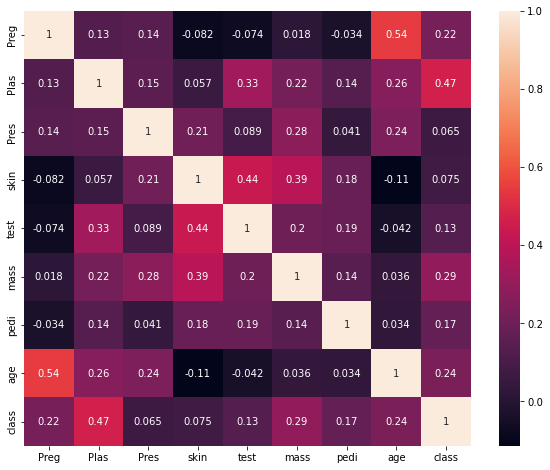

In [8]:
plt.figure(figsize=(10,8))
sb.heatmap(df.corr(), annot=True)

In [48]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Preg,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Plas,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
Pres,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
skin,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
test,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
mass,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
pedi,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
class,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [49]:
from sklearn.model_selection import train_test_split
X= df.drop('class', axis =1)
y= df['class']

In [50]:
y.value_counts(normalize=True)

0    0.651042
1    0.348958
Name: class, dtype: float64

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.2, stratify=y)

In [52]:
y_train.value_counts(normalize=True)

0    0.651466
1    0.348534
Name: class, dtype: float64

In [53]:
y_test.value_counts(normalize=True)

0    0.649351
1    0.350649
Name: class, dtype: float64

In [54]:
## DATA PREPARATION

In [55]:
# Replace 0s with serial mean
from sklearn.impute import SimpleImputer

In [56]:
imp= SimpleImputer(missing_values=0, strategy='median')
cols=list(X.drop(['Preg', 'age'], axis =1).columns)

X_train[cols] = imp.fit_transform(X_train[cols])
X_test[cols] = imp.transform(X_test[cols])

In [57]:
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Preg,614.0,3.811075,3.373944,0.000,1.000,3.000,6.00000,17.00
Plas,614.0,121.270358,30.726471,44.000,99.000,117.000,139.00000,198.00
Pres,614.0,72.278502,12.220472,24.000,64.000,72.000,80.00000,122.00
skin,614.0,28.789902,8.685355,7.000,25.000,29.000,32.00000,99.00
test,614.0,139.467427,82.906430,14.000,122.750,125.000,126.75000,846.00
mass,614.0,32.295765,7.008290,18.200,27.325,32.000,36.37500,67.10
pedi,614.0,0.471879,0.330835,0.078,0.247,0.369,0.61375,2.42
age,614.0,33.144951,11.584155,21.000,24.000,29.000,40.75000,81.00


In [58]:
#BUILDING THE MODEL

In [59]:
from sklearn.preprocessing import MinMaxScaler

In [60]:
scalar =MinMaxScaler()

In [61]:
X_train_sd = scalar.fit_transform(X_train)
X_test_sd = scalar.transform(X_test)

In [62]:
from sklearn.linear_model import LogisticRegression

In [68]:
log_reg =LogisticRegression(random_state =0)
log_reg.fit(X_train_sd, y_train)

LogisticRegression(random_state=0)

In [69]:
log_reg.score(X_train_sd, y_train)

0.7703583061889251

In [70]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix

In [71]:
# function to compute different metrics to check performance of a regression model
def model_performance_classification(model, predictors, target, threshold = 0.5):
    """
    Function to compute different metrics to check regression model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred_proba = model.predict_proba(predictors)[:, 1]
    # convert the probability to class
    pred_class = np.round(pred_proba > threshold)
    acc = accuracy_score(target, pred_class)  # to compute acuracy
    recall = recall_score(target, pred_class, average = "weighted")  # to compute recall
    precision = precision_score(target, pred_class, average="weighted")  # to compute precision
    f1 = f1_score(target, pred_class, average="weighted")  # to compute F1 score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1-score": f1
        },
        index=[0])
    conf = confusion_matrix(target, pred_class)
    plt.figure(figsize=(8, 5))
    sns.heatmap(conf, annot=True, fmt="g")
    plt.xlabel("Predicted label")
    plt.ylabel("Actual label")
    plt.show()
 
    return df_perf

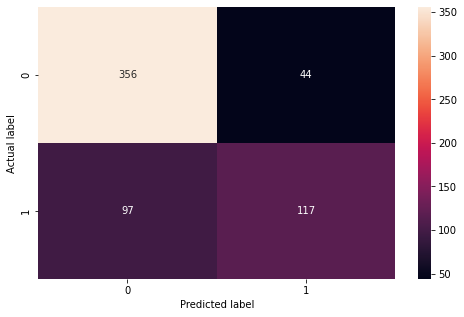

,Accuracy,Recall,Precision,F1-score
0,0.770358,0.770358,0.765251,0.761265


In [73]:
model_performance_classification(log_reg, X_train_sd, y_train)

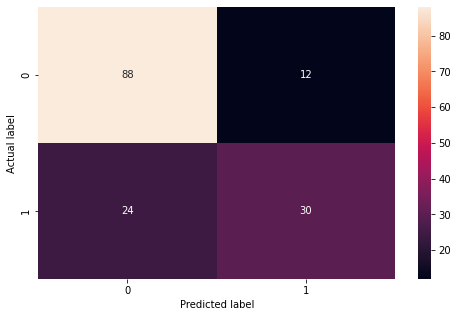

,Accuracy,Recall,Precision,F1-score
0,0.766234,0.766234,0.760668,0.758239


In [72]:
model_performance_classification(log_reg, X_test_sd, y_test)

In [74]:
from imblearn.over_sampling import ADASYN,BorderlineSMOTE, SMOTE, RandomOverSampler

In [75]:
over = RandomOverSampler(random_state=0)

In [78]:
smote= SMOTE(random_state=0)
X_sm, y_sm = smote.fit_resample(X,y)

In [76]:
X_over, y_over = over.fit_resample(X,y)

In [79]:
y_sm.value_counts(normalize=True)

1    0.5
0    0.5
Name: class, dtype: float64

In [80]:
X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X_sm,y_sm, test_size =0.2, stratify=y_sm)

In [81]:
imp= SimpleImputer(missing_values=0, strategy='median')
cols=list(X_sm.drop(['Preg', 'age'], axis =1).columns)

X_train_sm[cols] = imp.fit_transform(X_train_sm[cols])
X_test_sm[cols] = imp.transform(X_test_sm[cols])

In [82]:
X_train_sm_sd = scalar.fit_transform(X_train_sm)
X_test_sm_sd = scalar.transform(X_test_sm)

In [84]:
log_reg3 =LogisticRegression(random_state =0)
log_reg3.fit(X_train_sm_sd, y_train_sm)

LogisticRegression(random_state=0)

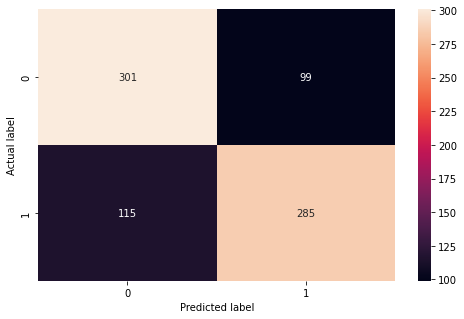

,Accuracy,Recall,Precision,F1-score
0,0.7325,0.7325,0.732873,0.732393


In [85]:
model_performance_classification(log_reg3, X_train_sm_sd, y_train_sm)